In [286]:
# Polonomial Regression (Feature engineerimg)
"""
compute_cost      ----- |
compute_gradient  -----  > Do same as linearg regression
gradient_descent  ----- |
z_score_normalization (Feature Scaling)
generate_polynomial_feature (Feature Engineering)  from X feature add features lik X^2 X^3 and son on
plot target vs estimated
"""

import numpy as np 
import matplotlib.pyplot as plt
import math,copy
np.set_printoptions(precision=2)

In [287]:
# compute_cost , squared root erors
""" j(w,b) = 1/2m * sum of ((w.X[i] + b)-y[i])^2
"""
def compute_cost(X,y,w,b):
    j_w_b = 0
    m = X.shape[0]
    for i in range(m):
        j_w_b = j_w_b + ((np.dot(X[i],w)+b)-y[i])**2
    j_w_b = j_w_b/(2*m)
    return j_w_b 

In [288]:
# compute_gradient
""" dj_dw = 1/m * sum of ((w.X[i]+b)-y[i]).X[i]
    dj_db = 1/m * sum of ((w.X[i]+b)-y[i])
"""
def compute_gradient(X,y,w,b):
    m,n=X.shape # rows and features
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range (m):
        dj_dw = dj_dw + ((np.dot(X[i],w)+b)-y[i]) * X[i]  #Scalr * Vector so no need to np.dot
        dj_db = dj_db + ((np.dot(X[i],w)+b)-y[i])
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw,dj_db

In [289]:
#gradient_descent
"""Repeat till convergence {
    w = w - alpha*dj_dw
    b = b - alpha*dj_db
}
"""
def gradient_descent(X,y,w,b,alpha,itr_num):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    for i in range(itr_num):
        dj_dw,dj_db = compute_gradient(X,y,w,b)
        w = w - alpha* dj_dw
        b = b - alpha * dj_db
        if i % math.ceil(itr_num/10)==0:
            print(f"Iteration {i:3d} w = {w} b = {b}")

    return w,b


In [290]:
# z_score_normalization
def z_score_normalization(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X = (X-mu)/sigma
    return mu,sigma,X


In [291]:
#genrate_poly_features
def generate_polynomial_features(X, degrees):
    X_poly = X.copy()
    for degree in degrees:
        if degree !=1 : #Skip degree 1 as its already an existing feature
            X_poly = np.concatenate((X_poly,X**degree),axis=1)    
    
    return X_poly

In [292]:
# Example usage:
X_train = np.array([[1], [2], [3], [4]])  # Feature matrix
y_train = np.array([2, 5, 10, 17])  # Target values

X_poly = generate_polynomial_features(X_train, degrees=[1,2])
mu,sigma,X_poly_norm = z_score_normalization(X_poly)

In [293]:
# run gradient_descent
w_final,b_final = gradient_descent(X_poly_norm,y_train,np.zeros(X_poly_norm.shape[1]),0,1e-2,1000)

Iteration   0 w = [0.06 0.05 0.05] b = 0.085
Iteration 100 w = [2.09 1.74 1.61] b = 5.419837848185773
Iteration 200 w = [2.48 1.75 1.54] b = 7.372561036070251
Iteration 300 w = [2.72 1.68 1.39] b = 8.087320876390129
Iteration 400 w = [2.92 1.61 1.27] b = 8.34894609419049
Iteration 500 w = [3.08 1.56 1.17] b = 8.444709385198072
Iteration 600 w = [3.21 1.52 1.08] b = 8.479761846813608
Iteration 700 w = [3.33 1.49 1.01] b = 8.492592181406136
Iteration 800 w = [3.42 1.46 0.94] b = 8.49728849881636
Iteration 900 w = [3.5  1.44 0.89] b = 8.499007502873388


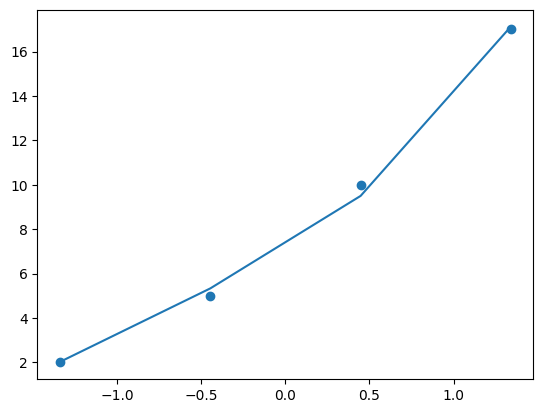

In [294]:
def predict(X,w,b): # X_norm w_final b_final
    m =X.shape[0]
    y = np.zeros(m)
    for i in range(m):
        y[i]=np.dot(w,X[i])+b
    return y

plt.scatter(X_poly_norm[:,0],y_train)
plt.plot(X_poly_norm[:,0], predict (X_poly_norm,w_final,b_final) )


In [295]:
zz = [1,7,9]
for i in zz:
    print(i)

1
7
9
